# Notebook for Problem sheet 2 - Q2.1


### Kingman's Coalescent 

System of L coalescing (merging) particles. Each pair of particles (total number of pairs is $\frac{L(L-1)}{2}$) coalesce independently at rate 1.

Let $N_t$ be the number of particles at time t.

**Transition rates (e.g g(n,m) for n,m in state space)**
- recall from notes $g(x,x) = - \sum_{y \neq x} g(x,y)$

**Generator**
- every CTMC has a generator: $(G f)(x) = \sum_{y \in S, y \neq x} g(x,y) [ f(y) - f(x) ]$

**Waiting Times (holding time)**
- For $X_0 = x$ define the waiting time $W_x := inf\{ t>0 : X_t \neq x \}$ = first time you leave x
- $W_x \sim \exp(g(x,x))$ with $\mathbb{E}[W_x] = \frac{1}{|g(x,x)|}$
- if $|g(x,x)|>0$ then walk jumps to $y \neq x$ after time $W_x$ with probability $\frac{g(x,y)}{|g(x,x)|}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

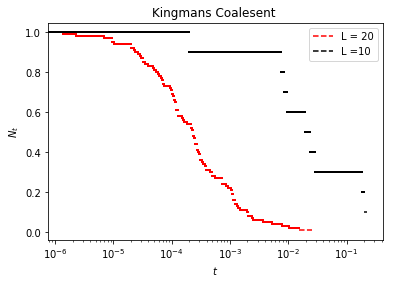

In [7]:
# sample paths of the process (2.1 d)

L=100

##### Simulate and PLOT ####

time=0.0 # initialize

for n in range(L,1,-1):  
    λ = n*(n-1)/2
    β=1.0/λ # beta
    waitTime=np.random.exponential(scale=β) # get a waiting time from exponential dist  

    plt.plot([time/L,(time+waitTime)/L],[n/L,n/L],'r',lw=2) # plot a bit
    
    time+=waitTime # update time
plt.plot([time/L,(time+2*waitTime)/L],[1/L,1/L],'r--', label = 'L = 20') # also add this line

    
LL = 10
time1=0.0 # initialize

for n in range(LL,1,-1):  
    λ = n*(n-1)/2
    β=1.0/λ # beta
    waitTime1=np.random.exponential(scale=β) # get a waiting time from exponential dist  

    plt.plot([time1/LL,(time1+waitTime1)/LL],[n/LL,n/LL],'k',lw=2) # plot a bit
    
    time1+=waitTime1 # update time

plt.plot([time1/LL,(time1+2*waitTime1)/LL],[1/LL,1/LL],'k--', label = 'L =10') # also add this line
    
plt.title('Kingmans Coalesent ')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$N_t$')

plt.yscale('linear') # linear y scale
plt.xscale('log') # change to log x scale